In [5]:
"""Dependencies"""
# !pip install import-ipynb

# Python ≥3.7 is required
import sys
assert sys.version_info >= (3, 7)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "1.0"
print('The scikit-learn version is {}.'.format(sklearn.__version__))


import gc
import pickle
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize #one-vs-all scheme
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from pandas.core.common import flatten
import matplotlib.pyplot as plt

#access drive
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/GRAD-C24_Machine_Learning/MLProject_KenyaFinancial

x_path= "/content/drive/MyDrive/GRAD-C24_Machine_Learning/MLProject_KenyaFinancial/clean_data/XoheImp.csv"
y_path= "/content/drive/MyDrive/GRAD-C24_Machine_Learning/MLProject_KenyaFinancial/clean_data/Y.csv"

The scikit-learn version is 1.0.2.
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/GRAD-C24_Machine_Learning/MLProject_KenyaFinancial


Loading data and recoding Y as a binary variable with mobile money = 1 and the rest = 0

In [2]:
#Set X and y values
X = pd.read_csv(x_path)
y = pd.read_csv(y_path)

In [3]:
yb = label_binarize(["b'Mobile money transfer (M-PESA, Airtel Money, Orange Money, Yu Cash, Tangaza, etc)'"], classes= y['trx_mode_desc'])
y = pd. DataFrame(yb) 
y = y.transpose()

Splitting data

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

Ridge Regression

In [7]:
pipe1 = Pipeline([('scaler', StandardScaler()), ('Ridge', LogisticRegression(C=2.15443469e+02, random_state=0, verbose=1))])

In [8]:
gc.collect()

275

In [9]:
clf1 = pipe1.fit(X_train, y_train)  # apply scaling on training data

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.5min finished


In [10]:
with open('Ridge1_binary', 'wb') as files:
    pickle.dump(clf1, files)

In [12]:
coefficients_Ridge = pd.DataFrame(zip(X_train.columns, np.transpose(list(flatten(pipe1.named_steps['Ridge'].coef_)))), columns=['features', 'coef']) 

In [13]:
coefficients_Ridge = coefficients_Ridge.sort_values(by=['coef'], ascending=False)

In [14]:
coefficients_Ridge.head(10)

,features,coef
244,trx_outlet1_b'nan',1.634717
27,"trx_family_code_b""b'MOBMNY'""",1.214007
8,"trx_family_code_b""b'COMM'""",1.003487
366,trx_type_code,0.815204
237,trx_outlet1_b'mobile',0.660105
218,trx_outlet1_b'individual',0.534336
17,"trx_family_code_b""b'FRMSAVWA'""",0.520740
452,con_hh_byti_pae_oecd_y,0.493682
480,rem_hh_count_byti_mm,0.482209
337,trx_purpose1_b'payments',0.457438


In [15]:
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

In [16]:
# Train the models and record the results
yproba = clf1.predict_proba(X_val)[::,1]
fpr, tpr, _ = roc_curve(y_val,  yproba)
auc = roc_auc_score(y_val, yproba)
result_table = result_table.append({'classifiers':clf1.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

Logistic regression

In [17]:
pipe2 = Pipeline([('scaler', StandardScaler()), ('logistic', LogisticRegression(penalty="none",
                                                           random_state=0,
                                                           solver = "lbfgs", 
                                                           verbose=4))])

In [18]:
gc.collect()

158

In [19]:
clf2= pipe2.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed

In [20]:
with open('Logistic_binary', 'wb') as files:
    pickle.dump(clf2, files)

In [21]:
coefficients_log = pd.DataFrame(zip(X_train.columns, np.transpose(list(flatten(pipe2.named_steps['logistic'].coef_)))), columns=['features', 'coef']) 

In [22]:
coefficients_log = coefficients_log.sort_values(by=['coef'], ascending=False)

In [23]:
coefficients_log.head(10)

,features,coef
244,trx_outlet1_b'nan',1.660734
27,"trx_family_code_b""b'MOBMNY'""",1.240315
8,"trx_family_code_b""b'COMM'""",1.005085
366,trx_type_code,0.825657
237,trx_outlet1_b'mobile',0.663947
218,trx_outlet1_b'individual',0.556253
17,"trx_family_code_b""b'FRMSAVWA'""",0.529987
452,con_hh_byti_pae_oecd_y,0.513859
480,rem_hh_count_byti_mm,0.483501
22,"trx_family_code_b""b'INFP2P'""",0.451540


In [24]:
# Train the models and record the results
yproba = clf2.predict_proba(X_val)[::,1]
fpr, tpr, _ = roc_curve(y_val,  yproba)
auc = roc_auc_score(y_val, yproba)
result_table = result_table.append({'classifiers':clf2.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

In [26]:
result_table

,fpr,tpr,auc
classifiers,,,
NaN,"[0.0, 0.0, 0.0, 7.076489778010516e-06, 7.07648...","[0.0, 0.0003224766204450177, 0.022573363431151...",0.990950
Pipeline,"[0.0, 0.0, 0.0, 7.076489778010516e-06, 7.07648...","[0.0, 0.0003224766204450177, 0.022250886810706...",0.990953


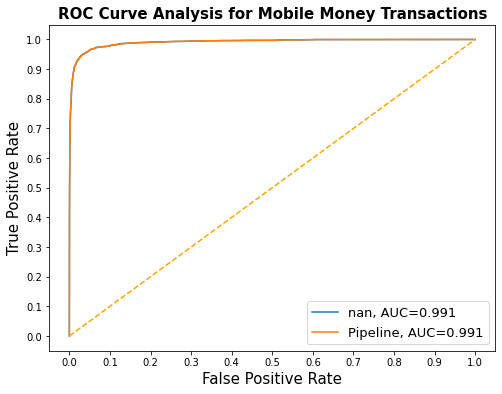

In [25]:
# Plot the figure
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis for Mobile Money Transactions', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [70]:
fig.savefig('logistic_roc_curve.png')